In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


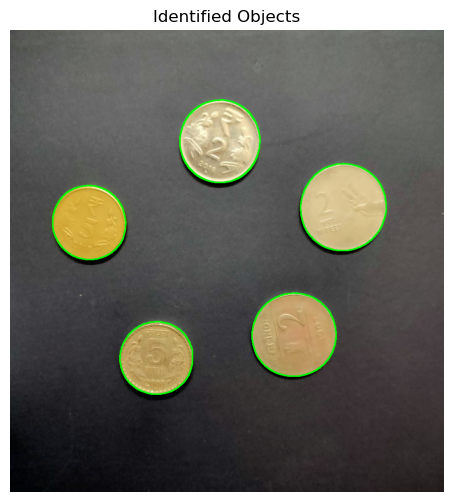

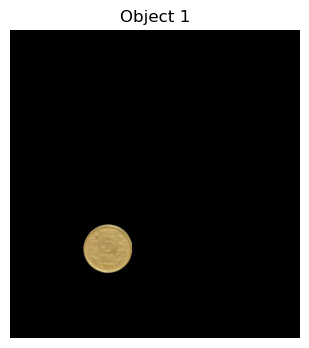

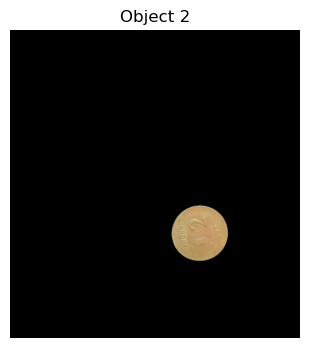

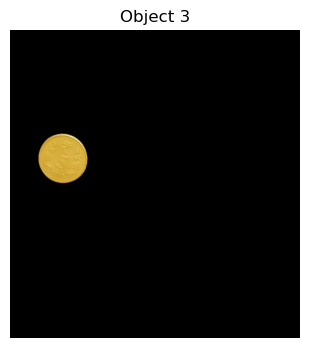

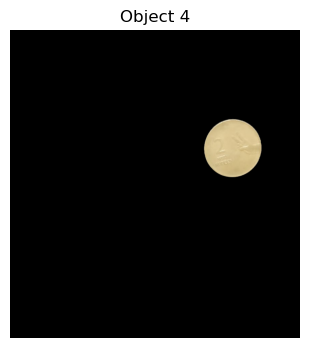

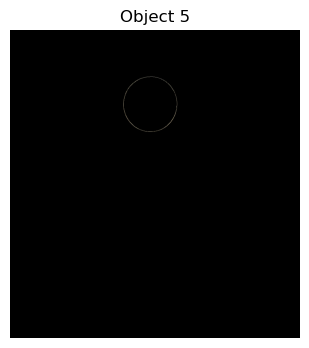

Total objects identified: 5
Segregated images saved to current directory


In [4]:
input_path = "C51.jpg"
original_img = cv2.imread(input_path)
grayscale_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur for noise reduction
smoothed_img = cv2.GaussianBlur(grayscale_img, (13, 13), 3)

# Edge detection
edge_detected = cv2.Canny(smoothed_img, 50, 150)

# Find contours (shapes)
shapes, _ = cv2.findContours(edge_detected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
highlighted_img = original_img.copy()
cv2.drawContours(highlighted_img, shapes, -1, (0, 255, 0), 2)

# Display the highlighted image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2RGB))
plt.title("Identified Objects")
plt.axis("off")
plt.show()

# Save the highlighted image
cv2.imwrite("highlighted_objects.jpg", highlighted_img)

# Process and save each isolated object
isolated_objects = []
for index, shape in enumerate(shapes):
    # Create a mask
    mask_layer = np.zeros_like(grayscale_img)
    cv2.drawContours(mask_layer, [shape], -1, 255, -1)
    
    # Extract the object using the mask
    segmented_object = cv2.bitwise_and(original_img, original_img, mask=mask_layer)
    isolated_objects.append(segmented_object)
    
    # Display the object
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(segmented_object, cv2.COLOR_BGR2RGB))
    plt.title(f"Object {index+1}")
    plt.axis("off")
    plt.show()
    
    # Save the segregated object
    cv2.imwrite(f"model1_coin_{index+1}.jpg", segmented_object)

# Function to count objects
def count_objects(shape_list):
    return len(shape_list)

# Count objects
object_count = count_objects(shapes)
print(f"Total objects identified: {object_count}")
print("Segregated images saved to current directory")


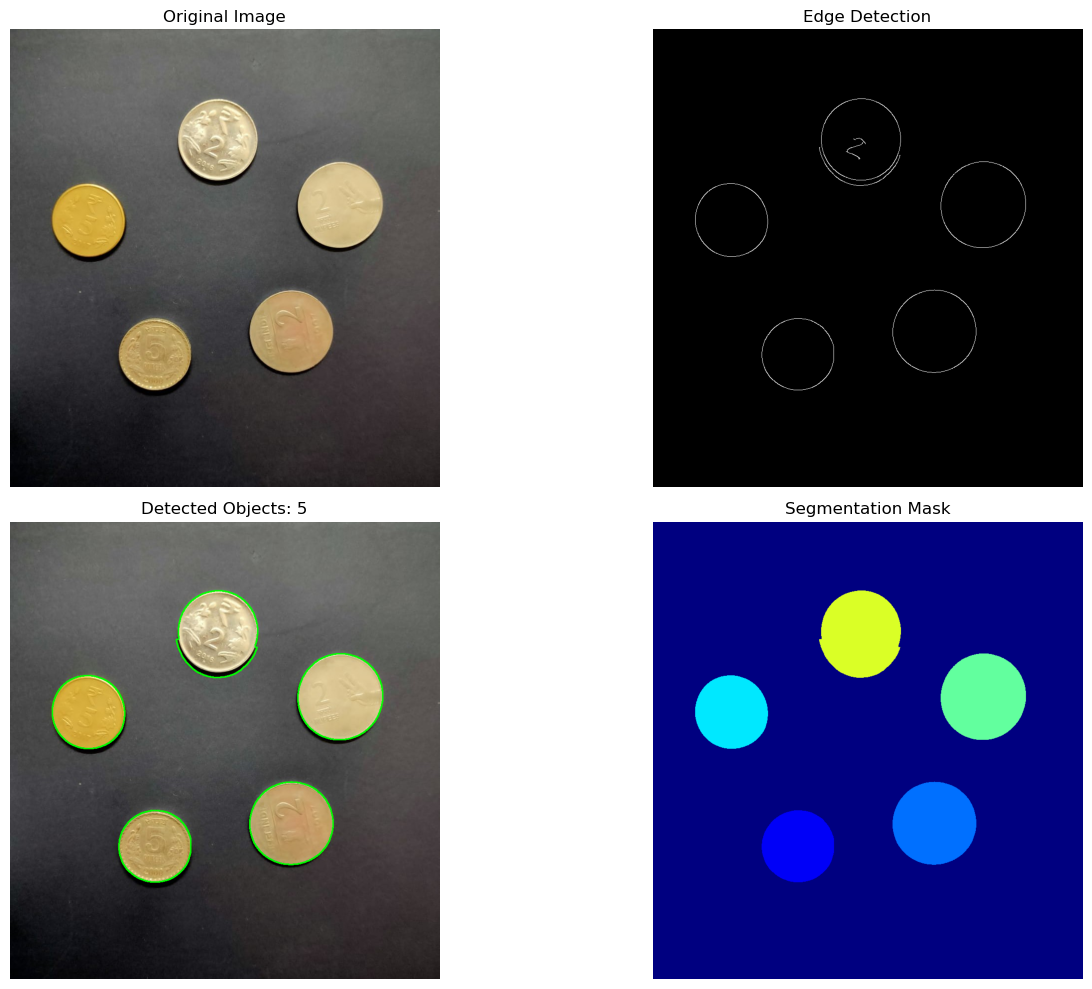

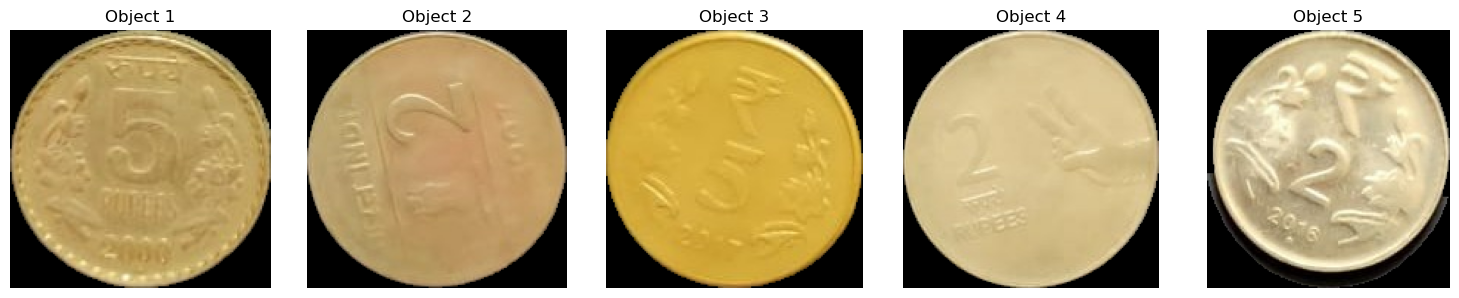

Total objects identified: 5
Segregated images saved to current directory


In [6]:
img_file = "C51.jpg"
img_data = cv2.imread(img_file)
backup_img = img_data.copy()

gray_scale = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
smooth_img = cv2.GaussianBlur(gray_scale, (11, 11), 2)

edge_detect = cv2.Canny(smooth_img, 30, 150)

filter_kernel = np.ones((5, 5), np.uint8)
processed_img = cv2.morphologyEx(edge_detect, cv2.MORPH_CLOSE, filter_kernel)

found_shapes, _ = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

detected_objects = []
shape_list = []
size_limit = (1000, 50000)

for shape in found_shapes:
    shape_size = cv2.contourArea(shape)
    if size_limit[0] < shape_size < size_limit[1]:
        shape_edge = cv2.arcLength(shape, True)
        roundness = (4 * np.pi * shape_size) / (shape_edge ** 2) if shape_edge > 0 else 0
        if roundness > 0.7:
            shape_list.append(shape)
            x_val, y_val, width, height = cv2.boundingRect(shape)
            detected_objects.append((x_val, y_val, width, height, shape))

highlight_img = backup_img.copy()
cv2.drawContours(highlight_img, shape_list, -1, (0, 255, 0), 2)
cv2.imwrite("identified_shapes.jpg", highlight_img)

segmentation_mask = np.zeros(gray_scale.shape, dtype=np.uint8)

extracted_shapes = []
for idx, (x_val, y_val, width, height, shape) in enumerate(detected_objects):
    temp_mask = np.zeros(gray_scale.shape, dtype=np.uint8)
    cv2.drawContours(temp_mask, [shape], -1, 255, -1)

    isolated_section = np.zeros_like(img_data)
    isolated_section[temp_mask == 255] = img_data[temp_mask == 255]

    cropped_section = isolated_section[y_val:y_val+height, x_val:x_val+width]
    extracted_shapes.append(cropped_section)

    cv2.imwrite(f"model2_coin_{idx+1}.jpg", cropped_section)
    cv2.drawContours(segmentation_mask, [shape], -1, idx+1, -1)

color_mask = cv2.applyColorMap(segmentation_mask * 30, cv2.COLORMAP_JET)
cv2.imwrite("segmentation_output.jpg", color_mask)

total_shapes = len(detected_objects)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(backup_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(edge_detect, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(highlight_img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Objects: {total_shapes}")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

if extracted_shapes:
    shape_count = len(extracted_shapes)
    cols = min(5, shape_count)
    rows = (shape_count + cols - 1) // cols

    plt.figure(figsize=(15, 3 * rows))
    for idx, section in enumerate(extracted_shapes):
        if np.sum(section) > 0:
            plt.subplot(rows, cols, idx + 1)
            plt.imshow(cv2.cvtColor(section, cv2.COLOR_BGR2RGB))
            plt.title(f"Object {idx+1}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

print(f"Total objects identified: {total_shapes}")
print("Segregated images saved to current directory")
